<a href="https://colab.research.google.com/github/Pravallika1234uppala/ML/blob/main/ML%20Models/Supervised%20Learning/Classification%20Models/Naive%20Bayes%20Algorithm/Bernouli%20Naive%20Bayes/Naive_Baye's_Classification_Algorithm_Bernoulli_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MULTI CLASS CLASSIFICATION PROBLEM

In [27]:
'''
In Bernouli two categories of data can also be taken as 1 or 0 leading to a sparse matrix.

Sparse matrix - Entire Data has maximum of 1 and 0's.
This technique of bernouli is specifically used in NLP Problem statement.

and multinomial is specifically used in NLP Problem statements.

When we have Sparse matrix we can either use bernouli or Multinomial Naive Bayes.

So, for NLP can use multinomial and Bernouli Naive Bayes.

'''


"\nIn Bernouli two categories of data can also be taken as 1 or 0 leading to a sparse matrix.\n\nSparse matrix - Entire Data has maximum of 1 and 0's.\nThis technique of bernouli is specifically used in NLP Problem statement.\n\nand multinomial is specifically used in NLP Problem statements.\n\nWhen we have Sparse matrix we can either use bernouli or Multinomial Naive Bayes.\n\nSo, for NLP can use multinomial and Bernouli Naive Bayes.\n\n"

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
df = pd.read_csv("cancer.csv")

In [30]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [31]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [32]:
df.rename(columns={'GENDER': 'gender', 'AGE': 'age', 'SMOKING': 'smoking', 'YELLOW_FINGERS': 'yellowfingers', 'ANXIETY': 'anxiety',
       'PEER_PRESSURE': 'peerpressure', 'CHRONIC DISEASE': 'chronicdisease', 'FATIGUE ': 'fatigue', 'ALLERGY ': 'allergy', 'WHEEZING': 'wheezing',
       'ALCOHOL CONSUMING': 'alcohol', 'COUGHING': 'cough', 'SHORTNESS OF BREATH': 'breath',
       'SWALLOWING DIFFICULTY': 'swallowdifficulty', 'CHEST PAIN': 'chestpain', 'LUNG_CANCER': 'lungcancer'}, inplace=True)

In [33]:
df.columns

Index(['gender', 'age', 'smoking', 'yellowfingers', 'anxiety', 'peerpressure',
       'chronicdisease', 'fatigue', 'allergy', 'wheezing', 'alcohol', 'cough',
       'breath', 'swallowdifficulty', 'chestpain', 'lungcancer'],
      dtype='object')

In [34]:
df

,gender,age,smoking,yellowfingers,anxiety,peerpressure,chronicdisease,fatigue,allergy,wheezing,alcohol,cough,breath,swallowdifficulty,chestpain,lungcancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [35]:
df.dtypes

,0
gender,object
age,int64
smoking,int64
yellowfingers,int64
anxiety,int64
peerpressure,int64
chronicdisease,int64
fatigue,int64
allergy,int64
wheezing,int64


In [36]:
df['gender']=np.where(df['gender'].str.contains('M'),0,1)


In [37]:
df['lungcancer']=np.where(df['lungcancer'].str.contains('NO'),0,1)

In [38]:
df

,gender,age,smoking,yellowfingers,anxiety,peerpressure,chronicdisease,fatigue,allergy,wheezing,alcohol,cough,breath,swallowdifficulty,chestpain,lungcancer
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [39]:
df.dtypes

,0
gender,int64
age,int64
smoking,int64
yellowfingers,int64
anxiety,int64
peerpressure,int64
chronicdisease,int64
fatigue,int64
allergy,int64
wheezing,int64


In [40]:
df.isnull().sum()

,0
gender,0
age,0
smoking,0
yellowfingers,0
anxiety,0
peerpressure,0
chronicdisease,0
fatigue,0
allergy,0
wheezing,0


<Axes: >

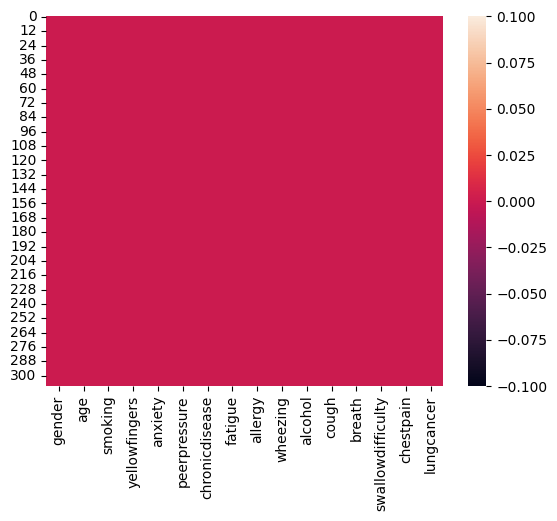

In [41]:
sns.heatmap(df.isnull())

<Axes: >

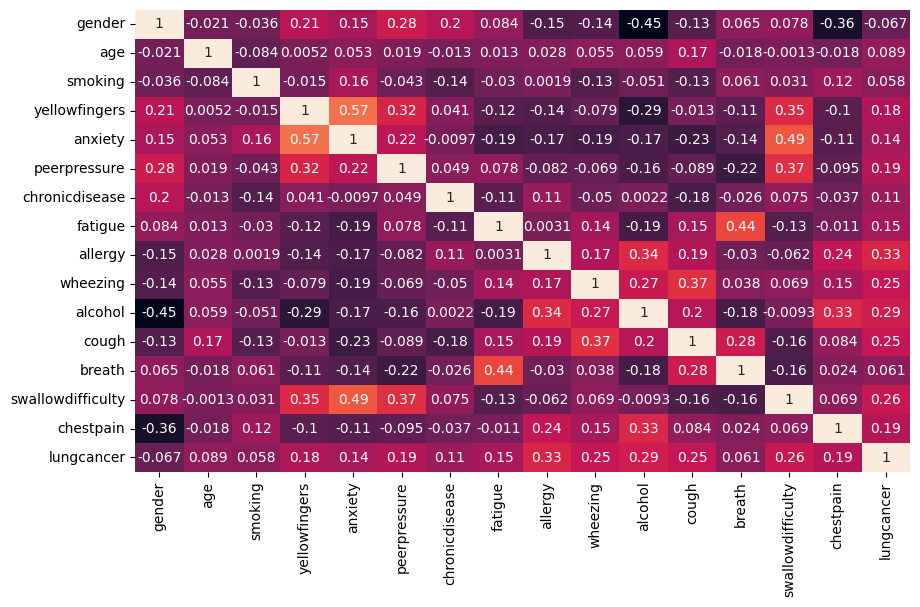

In [42]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cbar=False)

In [46]:
X = df.drop('lungcancer', axis=1)

In [47]:
y = df['lungcancer']

In [48]:
X

,gender,age,smoking,yellowfingers,anxiety,peerpressure,chronicdisease,fatigue,allergy,wheezing,alcohol,cough,breath,swallowdifficulty,chestpain
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [49]:
y

,lungcancer
0,1
1,1
2,0
3,0
4,0
...,...
304,1
305,1
306,1
307,1


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [52]:
X_train

,gender,age,smoking,yellowfingers,anxiety,peerpressure,chronicdisease,fatigue,allergy,wheezing,alcohol,cough,breath,swallowdifficulty,chestpain
69,1,78,2,2,2,2,1,2,1,2,1,2,2,2,1
238,1,38,1,2,1,1,2,2,2,2,1,2,2,1,2
179,1,72,2,2,2,2,1,2,1,2,1,2,2,2,1
84,0,56,1,1,1,1,2,2,2,1,2,2,2,1,2
88,1,62,2,2,2,1,2,1,2,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0,47,1,2,1,2,2,2,1,2,1,1,2,2,2
87,0,62,1,2,2,1,1,2,1,2,1,1,1,2,2
197,0,59,1,2,2,1,1,2,1,2,1,1,1,2,2
174,0,72,1,2,1,2,1,2,2,2,2,2,2,1,2


In [53]:
X_test

,gender,age,smoking,yellowfingers,anxiety,peerpressure,chronicdisease,fatigue,allergy,wheezing,alcohol,cough,breath,swallowdifficulty,chestpain
14,0,69,2,1,1,1,1,1,2,2,2,2,1,1,2
18,1,68,2,2,2,2,2,2,1,1,1,2,2,1,1
223,0,63,2,2,2,1,2,2,2,2,1,1,2,1,1
92,0,52,2,1,1,1,2,2,2,2,2,1,1,2,2
124,0,70,2,1,1,1,1,1,2,1,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1,70,1,1,1,2,2,1,2,1,2,2,2,1,1
42,1,77,1,2,2,2,2,2,1,2,2,1,1,1,1
300,1,63,2,2,2,2,2,2,2,2,1,2,2,2,2
71,1,66,2,2,2,2,1,2,1,2,1,2,2,2,1


### Bernoulli NAIVE BAYES

In [54]:
from sklearn.naive_bayes import BernoulliNB

In [55]:
bernb = BernoulliNB()

In [56]:
bernb

BernoulliNB()

In [57]:
bernb.fit(X_train, y_train)

BernoulliNB()

In [58]:
y_pred = bernb.predict(X_test)

In [59]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [60]:
y_test.to_numpy()

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [61]:
error = np.average(y_test-y_pred)
print(error)

-0.10256410256410256


In [65]:
#performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

score = accuracy_score(y_test, y_pred)
print(score*100)
cm = confusion_matrix(y_test, y_pred)
print(cm)
classreport = classification_report(y_test, y_pred)
print(classreport)

89.74358974358975
[[ 0  8]
 [ 0 70]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.90      1.00      0.95        70

    accuracy                           0.90        78
   macro avg       0.45      0.50      0.47        78
weighted avg       0.81      0.90      0.85        78



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


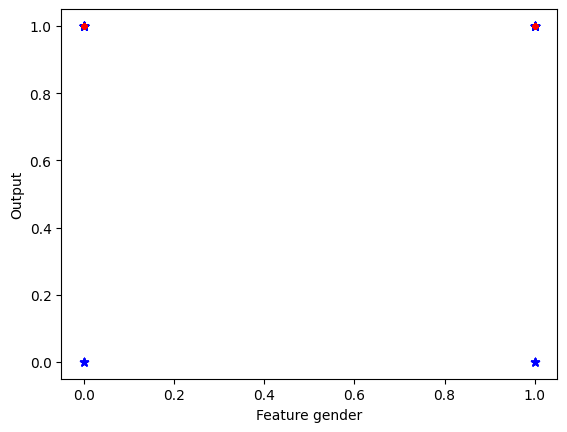

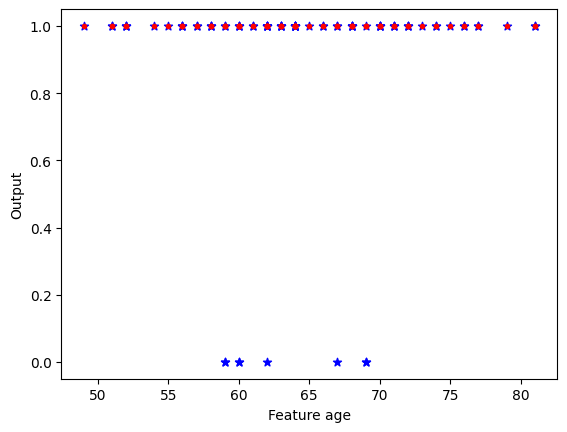

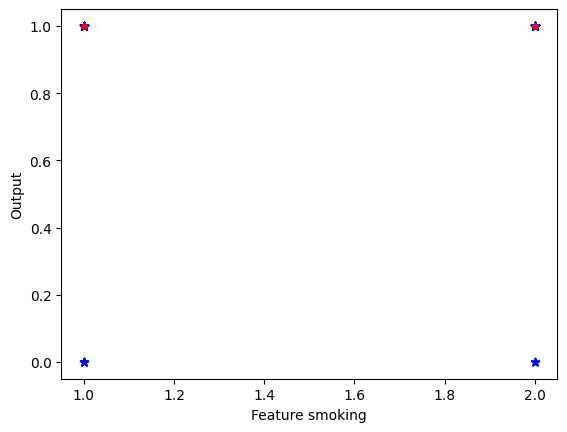

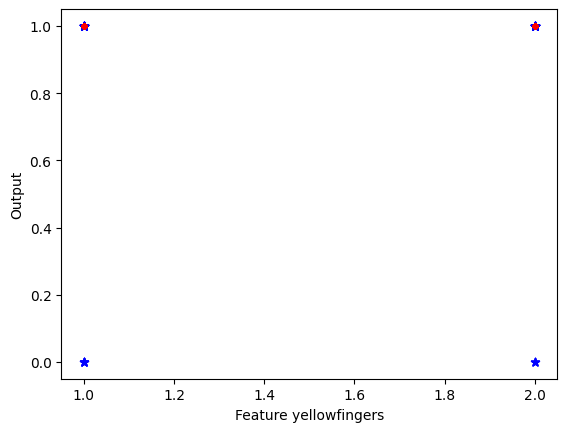

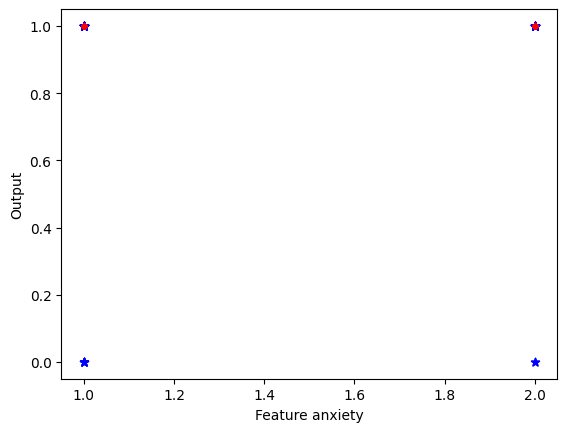

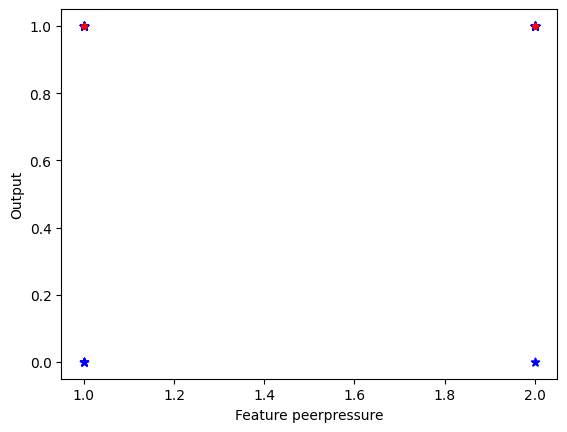

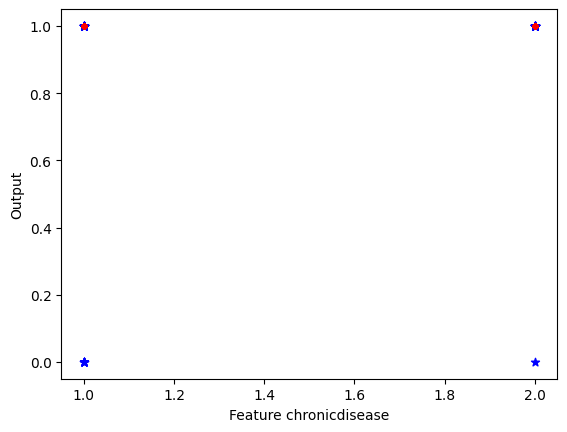

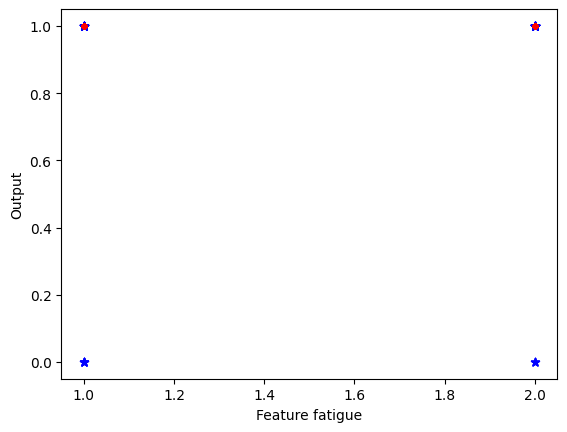

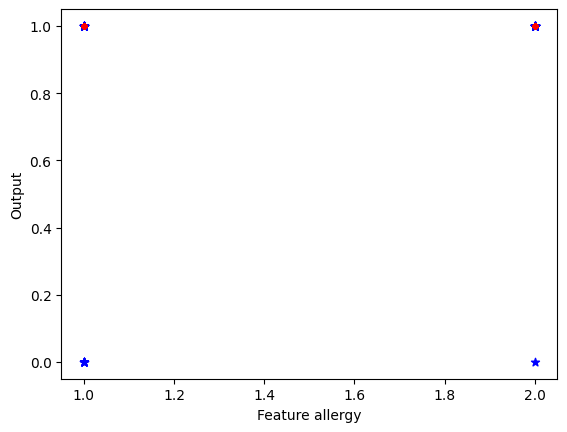

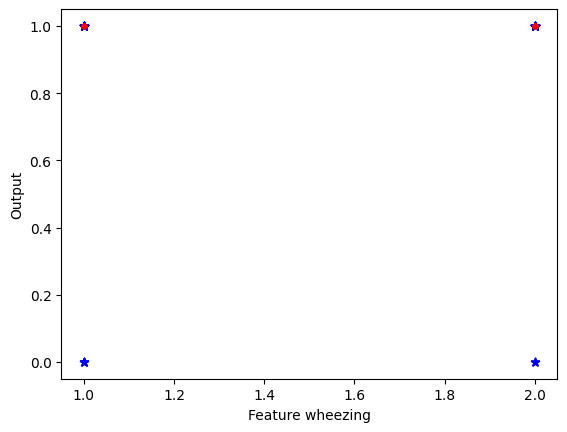

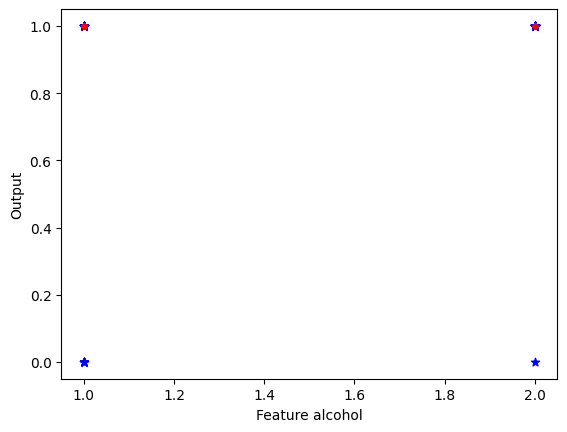

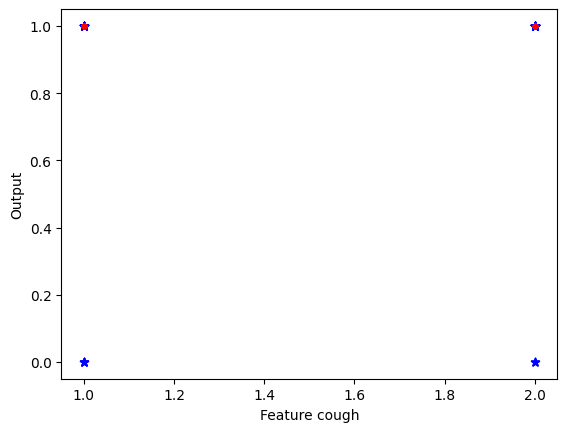

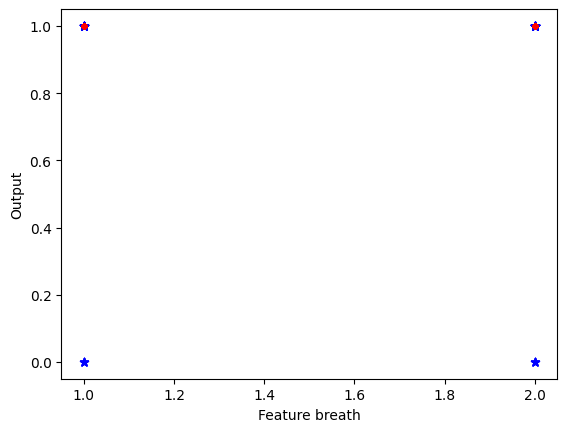

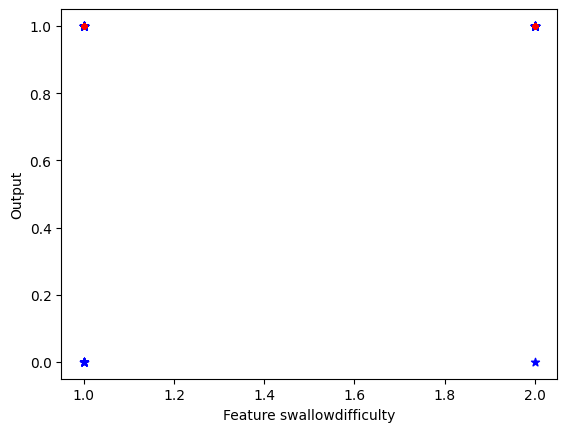

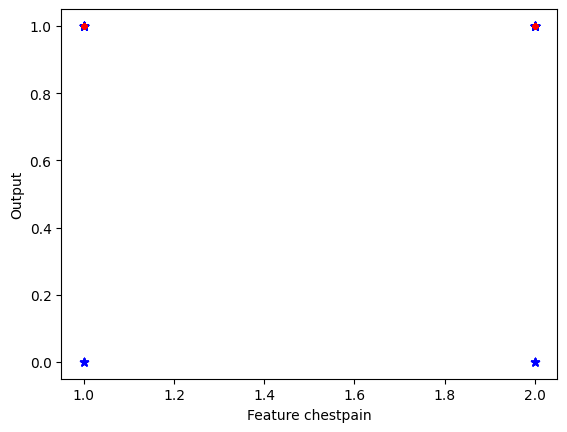

In [66]:
#plot for testing data:
Xt_df = pd.DataFrame(X_test)
for column in Xt_df.columns:
  plt.scatter(Xt_df[column], y_test, marker="*", color='blue')
  plt.scatter(Xt_df[column], bernb.predict(X_test), marker=".", color='red')
  plt.xlabel(f"Feature {column}")
  plt.ylabel("Output")
  plt.show()